<a href="https://colab.research.google.com/github/anuragtwb/DeepLearning/blob/main/Boston_dataset_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Regression Model using FFNN
#Tasks being carried out:
#- Understanding the data
#- Exploratory data analysis
#- Divide the data into train and test
#- Building NN model
#- Compile the model
#- Fit the model on training data set (by taking validation data separately out of training data)
#- Check whether there is an overfit by comparing training loss and validation loss
#- Plot the loss
#- If there is an overfit, try to overcome using some regularization technique


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.4.1


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data['MEDV'] = pd.Series(data = boston.target, index= data.index)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
train_dataset = data.sample(frac= 0.7, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
# Inspect the data
# have a quick look at the joint distribution of a few pairs of columns from the training set


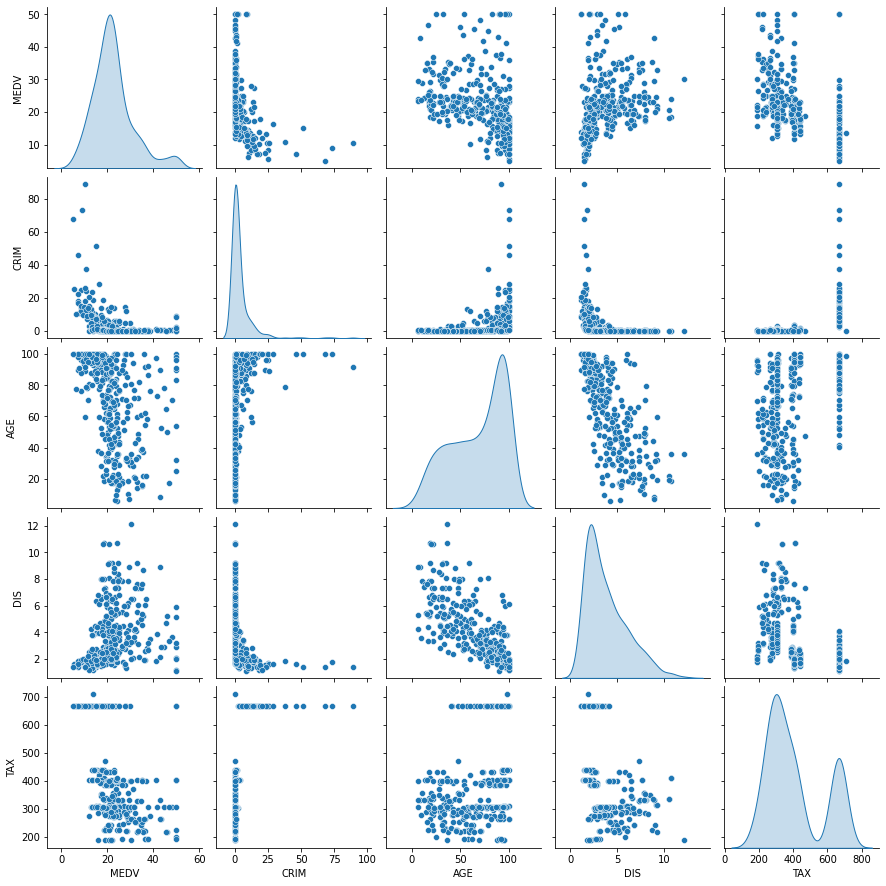

In [ ]:
sns.pairplot(train_dataset[["MEDV","CRIM","AGE","DIS","TAX"]], diag_kind="kde")


In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


In [ ]:
# Split feature from labels

In [ ]:
train_labels = train_dataset.pop('MEDV')  # Y_train
test_labels = test_dataset.pop('MEDV')   #Y_test

In [ ]:
# Normalize the data
#Look again at the train_stats block above and note how different the ranges of each feature are.

#It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

#Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.


In [ ]:
def norm(x):
  return (x- train_stats['mean'])/ train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([layers.Dense(64, activation='relu', input_shape = [len(train_dataset.keys())]),
                            layers.Dense(64, activation='relu'),
                            
                            layers.Dense(1)
                            ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics = ['mae','mse','mape'])
  return model

In [ ]:
model=build_model()

In [ ]:
model.summary()  # summary method  to print simple discription of the model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Now try out the model . Take a batch of 10 example from training data and call mode predict on it

In [ ]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[0.48387152],
       [0.76976424],
       [0.32186556],
       [0.40138376],
       [0.17061508],
       [0.42410702],
       [0.5910165 ],
       [0.53167045],
       [0.36629197],
       [0.5203393 ]], dtype=float32)

### Train the model
Train the model for 1000 epochs, and record the training and validation accuracy in the history object.

Note the validation_split set to use 20% of the training data as validation set and the remainder as calibration. Important to note that this is separate from the testing data that we do not touch in the model-training.


In [ ]:
#Display taining progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100==0:
      print("")
      print(".",end='')
  
EPOCHS=1000

history=model.fit(normed_train_data,train_labels,
                  epochs=EPOCHS,validation_split=0.2,verbose=1)             #,callbacks=[PrintDot()]

Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 500.7333 - mae: 20.7613 - mse: 500.7333 - mape: 94.1462 - val_loss: 556.3310 - val_mae: 21.5516 - val_mse: 556.3310 - val_mape: 86.4843
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 424.5280 - mae: 19.0288 - mse: 424.5280 - mape: 83.8698 - val_loss: 474.1879 - val_mae: 19.6834 - val_mse: 474.1879 - val_mape: 77.8480
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 319.7143 - mae: 16.0984 - mse: 319.7143 - mape: 72.7421 - val_loss: 390.2508 - val_mae: 17.7148 - val_mse: 390.2508 - val_mape: 70.3415
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 277.6631 - mae: 14.9886 - mse: 277.6631 - mape: 64.1758 - val_loss: 309.9682 - val_mae: 15.6448 - val_mse: 309.9682 - val_mape: 63.3339
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 227.0427 - mae: 12.8044 - mse: 227.0427 - mape: 54.4571 - val_loss: 235.8164 - val_mae: 13.3675

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,0.612156,0.579786,0.612156,2.906023,32.016544,3.043621,32.016544,20.513847,995
996,0.455191,0.484590,0.455191,2.649367,28.800377,2.868674,28.800377,18.575861,996
997,0.558640,0.518876,0.558640,2.571398,30.039850,2.888990,30.039850,19.106733,997
998,0.697985,0.662315,0.697985,3.661070,30.630774,2.972235,30.630774,19.625608,998
999,0.634007,0.543099,0.634007,2.725934,28.813490,2.931465,28.813490,18.615374,999


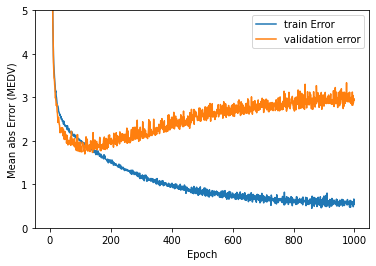

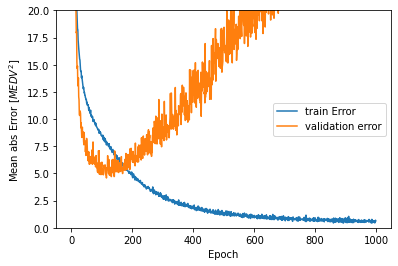

In [ ]:
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean abs Error (MEDV)')
  plt.plot(hist['epoch'],hist['mae'],label='train Error')
  plt.plot(hist['epoch'],hist["val_mae"],label='validation error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean abs Error [$MEDV^2$]')
  plt.plot(hist['epoch'],hist['mse'],label='train Error')
  plt.plot(hist['epoch'],hist["val_mse"],label='validation error')
  plt.ylim([0,20])
  plt.legend()

plot_history(history)


This graph shows little improvement, or actually a fairly severe degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.


In [ ]:
model=build_model()
#the patience parameter is the aamount of eppochs to check for imporvement
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(normed_train_data,train_labels,epochs=EPOCHS,
                  validation_split=0.2,verbose=1,callbacks=[early_stop,PrintDot()])

Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 551.5136 - mae: 21.8551 - mse: 551.5136 - mape: 98.2961 - val_loss: 627.4520 - val_mae: 22.9763 - val_mse: 627.4520 - val_mape: 92.7388

.Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 512.6206 - mae: 20.7113 - mse: 512.6206 - mape: 91.1334 - val_loss: 579.0731 - val_mae: 21.8250 - val_mse: 579.0731 - val_mape: 86.3956
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 455.9720 - mae: 19.2863 - mse: 455.9720 - mape: 84.5063 - val_loss: 521.1077 - val_mae: 20.5546 - val_mse: 521.1077 - val_mape: 81.2300
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 407.0706 - mae: 18.0126 - mse: 407.0706 - mape: 76.4865 - val_loss: 453.4351 - val_mae: 19.0945 - val_mse: 453.4351 - val_mape: 76.5128
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 355.1978 - mae: 16.6632 - mse: 355.1978 - mape: 69.1118 - val_loss: 380.4597 - val_mae: 17.35

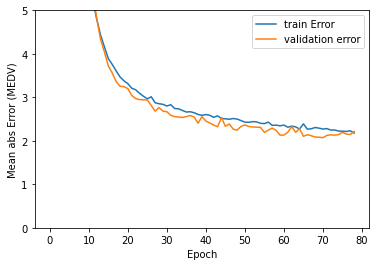

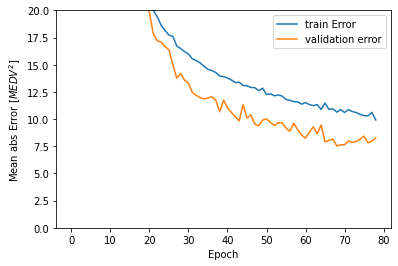

In [ ]:
plot_history(history)

In [ ]:
mse=model.evaluate(normed_test_data,test_labels,verbose=0)
print('testing set mean abs error :' , mse)


testing set mean abs error : [11.562304496765137, 2.4152896404266357, 11.562304496765137, 12.647212982177734]


## make prediction

```
`# This is formatted as code`
```

in

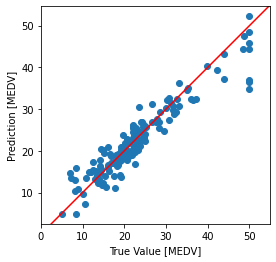

In [ ]:
test_prediction=model.predict(normed_test_data).flatten()
train_predictions=model.predict(normed_train_data).flatten()

plt.scatter(test_labels,test_prediction)
plt.xlabel('True Value [MEDV]')
plt.ylabel('Prediction [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.xlim([0,plt.xlim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error (test_labels, test_prediction)
print('Mean Squared Error:',mse)
mae = mean_absolute_error (test_labels, test_prediction)
print('Mean Absolute Error:',mae)
rsq = r2_score(train_labels, train_predictions) 
print('R-square, Training:',rsq)
rsq = r2_score(test_labels, test_prediction)
print('R-square, Training:',rsq)

Mean Squared Error: 11.56230645672866
Mean Absolute Error: 2.4152901310669743
R-square, Training: 0.8762221138153627
R-square, Training: 0.88317968036174
